# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('demo01.csv')

df = df.dropna()

df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns=["mau"])
y = df["mau"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(df)


       qtd_filhos      idade  tempo_emprego  possui_celular  \
0               0  58.832877       3.106849               1   
1               0  52.356164       8.358904               1   
2               0  52.356164       8.358904               1   
3               0  46.224658       2.106849               1   
4               0  29.230137       3.021918               1   
...           ...        ...            ...             ...   
16645           0  54.109589       9.884932               1   
16646           0  43.389041       7.380822               1   
16647           0  30.005479       9.800000               1   
16648           0  30.005479       9.800000               1   
16649           0  33.936986       3.630137               1   

       possui_fone_comercial  possui_fone  possui_email  \
0                          0            0             0   
1                          0            1             1   
2                          0            1             1   
3      

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

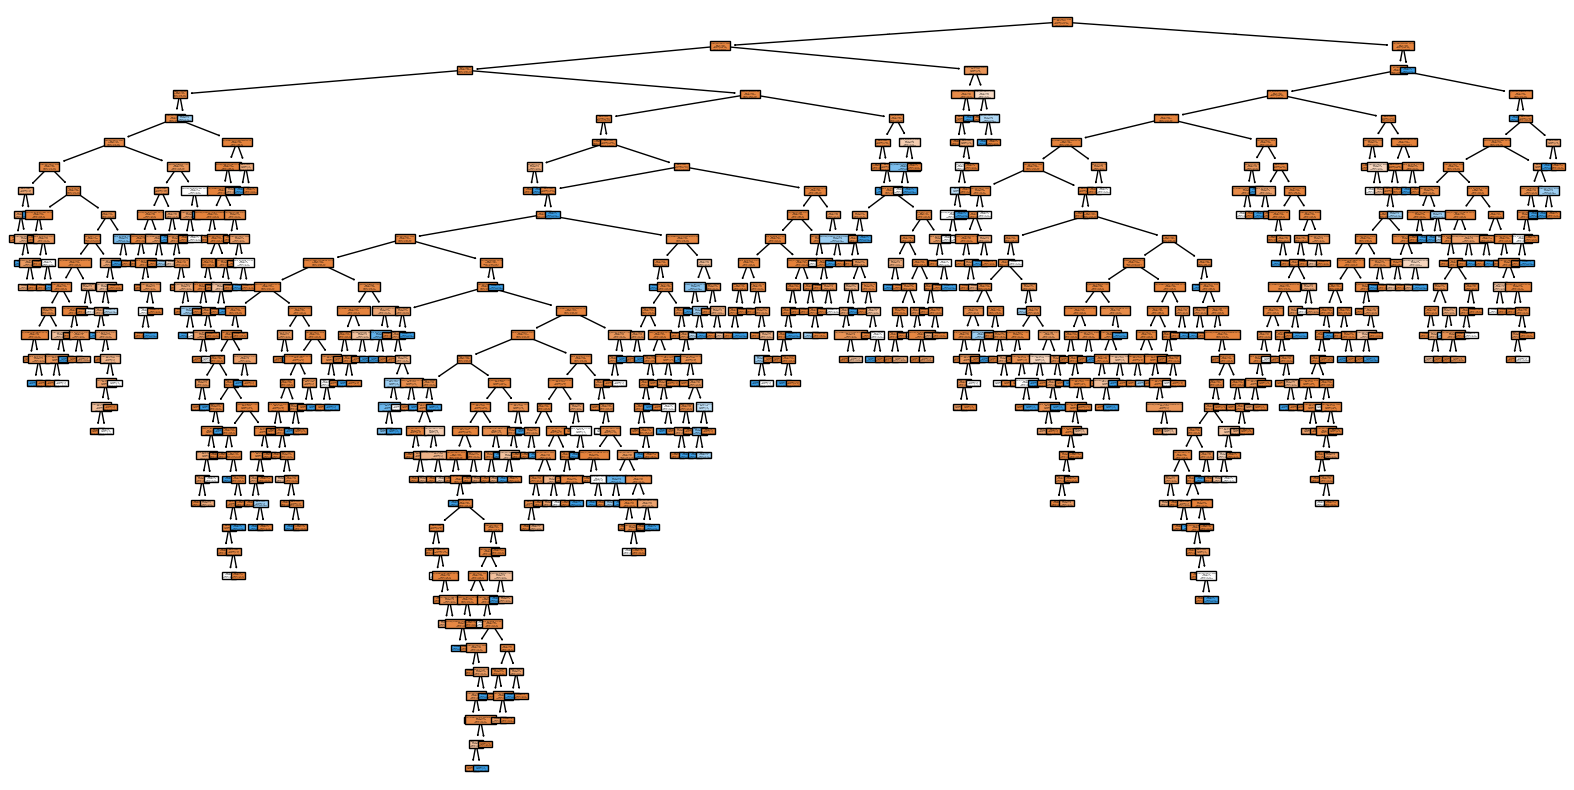

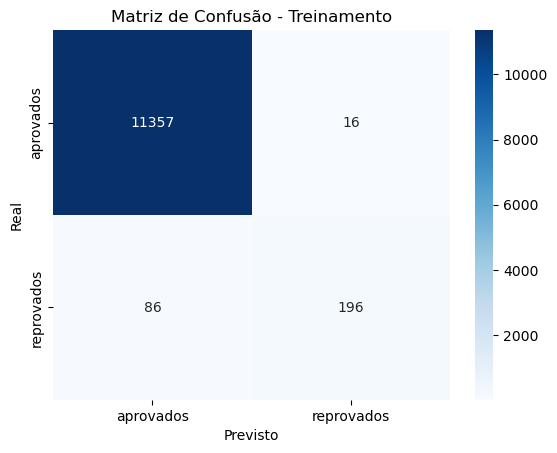

Acurácia na base de treinamento: 0.99


In [23]:
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)


plt.figure(figsize=(20, 10))
plot_tree(modelo, filled=True, feature_names=X.columns, class_names=["aprovados", "reprovados"])
plt.show()


y_train_pred = modelo.predict(X_train)


conf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["aprovados", "reprovados"], yticklabels=["aprovados", "reprovados"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Treinamento")
plt.show()

# Calcular a acurácia na base de treinamento
acuracia = accuracy_score(y_train, y_train_pred)
print(f"Acurácia na base de treinamento: {acuracia:.2f}")



#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

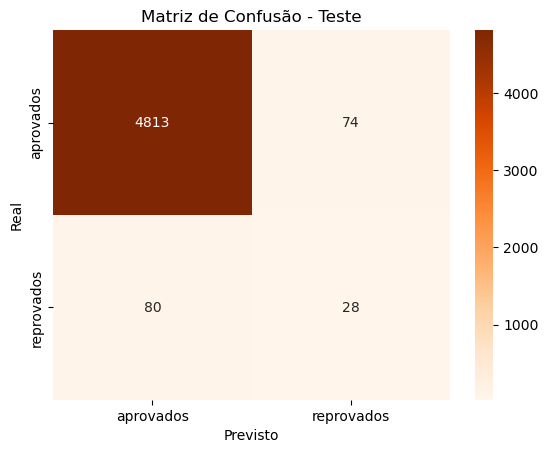

Acurácia na base de teste: 0.97


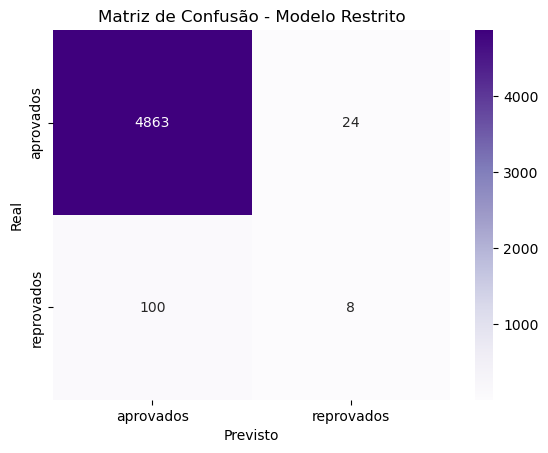

Proporção de proponentes classificados como 'maus': 0.01
Acurácia se todos fossem classificados como 'bons': 0.98


In [24]:
y_test_pred = modelo.predict(X_test)

# Matriz de confusão - Teste
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Oranges", xticklabels=["aprovados", "reprovados"], yticklabels=["aprovados", "reprovados"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Teste")
plt.show()

# Calcular a acurácia na base de teste
acuracia_test = accuracy_score(y_test, y_test_pred)
print(f"Acurácia na base de teste: {acuracia_test:.2f}")

# Treinar nova árvore com restrições de complexidade
modelo_restrito = DecisionTreeClassifier(random_state=123, max_depth=10, min_samples_leaf=5)
modelo_restrito.fit(X_train, y_train)

# Classificar a base de teste com o novo modelo
y_test_pred_restrito = modelo_restrito.predict(X_test)

# Matriz de confusão - Novo modelo
conf_matrix_test_restrito = confusion_matrix(y_test, y_test_pred_restrito)
sns.heatmap(conf_matrix_test_restrito, annot=True, fmt="d", cmap="Purples", xticklabels=["aprovados", "reprovados"], yticklabels=["aprovados", "reprovados"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Modelo Restrito")
plt.show()

# Proporção de "maus" classificados
taxa_maus = sum(y_test_pred_restrito) / len(y_test_pred_restrito)
print(f"Proporção de proponentes classificados como 'maus': {taxa_maus:.2f}")

# Acurácia classificando todos como "bons"
y_test_todos_bons = [0] * len(y_test)
acuracia_todos_bons = accuracy_score(y_test, y_test_todos_bons)
print(f"Acurácia se todos fossem classificados como 'bons': {acuracia_todos_bons:.2f}")